In [24]:
# pip install -r requirements.txt
# pip freeze


In [1]:
from functions import get_data_api
from functions import convert_date
from functions import replace_urls_with_names
from functions import bd_save
from functions import load_bd
from functions import list_tables_bd
import pandas as pd
import matplotlib.pyplot as plt
import json

<h1 align="center"><strong>ETAPA DE EXTRAÇÃO</strong></h1>


### ***CHARACTERS***

In [2]:
def get_all_characters():
    base = 'Characters'
    etapa = ' Extração'
    character_url_next = 'https://rickandmortyapi.com/api/character'

    all_characters = []  
    
    while character_url_next:  
        character_data = get_data_api(character_url_next, base, etapa) 
        character_url_next = character_data['info']['next'] 
        all_characters.extend(character_data['results'])  
        
    
    return all_characters

characters = get_all_characters()

print(len(characters))

826


In [3]:
df_characters = pd.DataFrame(characters)

df_characters.info()

df_characters.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        826 non-null    int64 
 1   name      826 non-null    object
 2   status    826 non-null    object
 3   species   826 non-null    object
 4   type      826 non-null    object
 5   gender    826 non-null    object
 6   origin    826 non-null    object
 7   location  826 non-null    object
 8   image     826 non-null    object
 9   episode   826 non-null    object
 10  url       826 non-null    object
 11  created   826 non-null    object
dtypes: int64(1), object(11)
memory usage: 77.6+ KB


,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z


### ***LOCATIONS***

In [4]:
def get_all_locations():

    base = 'Locations'
    etapa = ' Extração'
    
    location_url_next = 'https://rickandmortyapi.com/api/location'

    all_locations = []  
    
    while location_url_next:  
        location_data = get_data_api(location_url_next, base, etapa) 
        location_url_next = location_data['info']['next'] 
        all_locations.extend(location_data['results'])  
        
    
    return  all_locations

locations = get_all_locations()

print(len(locations))

126


In [5]:
df_locations = pd.DataFrame(locations)

df_locations.info()

df_locations.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         126 non-null    int64 
 1   name       126 non-null    object
 2   type       126 non-null    object
 3   dimension  126 non-null    object
 4   residents  126 non-null    object
 5   url        126 non-null    object
 6   created    126 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


,id,name,type,dimension,residents,url,created
0,1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z
1,2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,2017-11-10T13:06:38.182Z


### ***EPISODES***

In [6]:
def get_all_episodes():

 episode_url_next = 'https://rickandmortyapi.com/api/episode'

 base = "Episodes"
 etapa = "Extração"

 all_episodes = []

 while episode_url_next:
  episode_data = get_data_api(episode_url_next, base, etapa)
  episode_url_next = episode_data['info']['next']
  all_episodes.extend(episode_data['results'])

 return all_episodes

episodes = get_all_episodes()

print(len(episodes))

51


In [7]:
df_episodes = pd.DataFrame(episodes)

df_episodes.info()

df_episodes.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          51 non-null     int64 
 1   name        51 non-null     object
 2   air_date    51 non-null     object
 3   episode     51 non-null     object
 4   characters  51 non-null     object
 5   url         51 non-null     object
 6   created     51 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


,id,name,air_date,episode,characters,url,created
0,1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z


<h1 align="center"><strong>ETAPA DE TRANSFORMAÇÃO</strong></h1>


### **CHARACTERS**

In [8]:

df_characters["type"] = df_characters["type"].replace("", "unknown")

df_characters["name_origin"] = df_characters["origin"].apply(lambda name_origin: name_origin.get("name"))
df_characters["url_origin"] = df_characters["origin"].apply(lambda url_origin: url_origin.get("url") )

df_characters["location_name"] = df_characters["location"].apply(lambda location_name: location_name.get("name"))
df_characters["url_location"] = df_characters["location"].apply(lambda url_location: url_location.get("url"))

df_characters["total_episodes"] = df_characters["episode"].apply(len)


df_characters.rename(columns={'url': 'character_url'}, inplace=True)

df_characters = df_characters.drop(columns=["origin", "location", "created", "episode"])


df_characters.head()

,id,name,status,species,type,gender,image,character_url,name_origin,url_origin,location_name,url_location,total_episodes
0,1,Rick Sanchez,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,Earth (C-137),https://rickandmortyapi.com/api/location/1,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
1,2,Morty Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,unknown,,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
2,3,Summer Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/3,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42
3,4,Beth Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/4,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42
4,5,Jerry Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/5,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,39


### ***LOCATIONS***

In [9]:
df_locations.head(2)



,id,name,type,dimension,residents,url,created
0,1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z
1,2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,2017-11-10T13:06:38.182Z


In [10]:
#Rename and drop columns
df_locations.rename(columns={'residents': 'residents_name'}, inplace=True)
df_locations.rename(columns={'url': 'location_url'}, inplace=True)
df_locations = df_locations.drop(columns=[ "created"])


df_locations['residents_name'] = df_locations['residents_name'].apply(
    lambda urls: replace_urls_with_names(df_characters, 'character_url', 'name', urls)
)


df_locations["total_residents"] = df_locations["residents_name"].apply(len)


# Garantir que os valores sejam do tipo strings para não dar erro na etapa de bd
df_locations['residents_name'] = df_locations['residents_name'].apply(str)

df_locations.head(2)

,id,name,type,dimension,residents_name,location_url,total_residents
0,1,Earth (C-137),Planet,Dimension C-137,"['Beth Smith', 'Bill', 'Conroy', 'Cronenberg R...",https://rickandmortyapi.com/api/location/1,27
1,2,Abadango,Cluster,unknown,['Abadango Cluster Princess'],https://rickandmortyapi.com/api/location/2,1


### ***EPISODES***

In [11]:
df_episodes.head(2)

,id,name,air_date,episode,characters,url,created
0,1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z


In [12]:
df_episodes.rename(columns={
  'characters': 'characters_name',
  'url': 'episode_url'
  }, inplace=True)


df_episodes['air_date'] = df_episodes['air_date'].apply(convert_date)
df_episodes = df_episodes.drop(columns=["created"])

df_episodes['characters_name'] = df_episodes['characters_name'].apply(
    lambda urls: replace_urls_with_names(df_characters, 'character_url', 'name', urls)
)

df_episodes["total_characters_in_the_episode"] = df_episodes["characters_name"].apply(len)


# Garantir que os valores sejam strings
df_episodes['characters_name'] = df_episodes['characters_name'].apply(str)



df_episodes.head(8)


,id,name,air_date,episode,characters_name,episode_url,total_characters_in_the_episode
0,1,Pilot,02/12/2013,S01E01,"['Rick Sanchez', 'Morty Smith', 'Bepisian', 'B...",https://rickandmortyapi.com/api/episode/1,19
1,2,Lawnmower Dog,09/12/2013,S01E02,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/2,19
2,3,Anatomy Park,16/12/2013,S01E03,"['Rick Sanchez', 'Morty Smith', 'Alexander', '...",https://rickandmortyapi.com/api/episode/3,24
3,4,M. Night Shaym-Aliens!,13/01/2014,S01E04,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/4,13
4,5,Meeseeks and Destroy,20/01/2014,S01E05,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/5,20
5,6,Rick Potion #9,27/01/2014,S01E06,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/6,24
6,7,Raising Gazorpazorp,10/03/2014,S01E07,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/7,14
7,8,Rixty Minutes,17/03/2014,S01E08,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/8,57


<h1 align="center"><strong>ETAPA DE BANCO DE DADOS</strong></h1>


In [13]:
path_db = 'rick-and-morty-api.db'
table_name = 'characters'

bd_save(df_characters, path_db, table_name, base='CharacterBase', stage='Banco de Dados')

Dados importados com sucesso na tabela 'characters' do banco 'rick-and-morty-api.db'


In [14]:
path_db = 'rick-and-morty-api.db'
table_name = 'locations'

bd_save(df_locations, path_db, table_name, base='LocationBase', stage='Banco de Dados')


Dados importados com sucesso na tabela 'locations' do banco 'rick-and-morty-api.db'


In [15]:
path_db = 'rick-and-morty-api.db'
table_name = 'episodes'

bd_save(df_episodes, path_db, table_name, base='EpisodeBase', stage='Banco de Dados')

Dados importados com sucesso na tabela 'episodes' do banco 'rick-and-morty-api.db'


In [16]:
print("Tabelas no banco de dados:")

list_tables_bd(path_db, base='Rick and Morty API', stage='Banco de Dados')

Tabelas no banco de dados:


,name
0,characters
1,locations
2,episodes


In [17]:
path_db = 'rick-and-morty-api.db'


load_bd(table_name, path_db, base='Episodes', stage='Banco de Dados')

,id,name,air_date,episode,characters_name,episode_url,total_characters_in_the_episode
0,1,Pilot,02/12/2013,S01E01,"['Rick Sanchez', 'Morty Smith', 'Bepisian', 'B...",https://rickandmortyapi.com/api/episode/1,19
1,2,Lawnmower Dog,09/12/2013,S01E02,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/2,19
2,3,Anatomy Park,16/12/2013,S01E03,"['Rick Sanchez', 'Morty Smith', 'Alexander', '...",https://rickandmortyapi.com/api/episode/3,24
3,4,M. Night Shaym-Aliens!,13/01/2014,S01E04,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/4,13
4,5,Meeseeks and Destroy,20/01/2014,S01E05,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/5,20
5,6,Rick Potion #9,27/01/2014,S01E06,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/6,24
6,7,Raising Gazorpazorp,10/03/2014,S01E07,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/7,14
7,8,Rixty Minutes,17/03/2014,S01E08,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/8,57
8,9,Something Ricked This Way Comes,24/03/2014,S01E09,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/9,17
9,10,Close Rick-counters of the Rick Kind,07/04/2014,S01E10,"['Rick Sanchez', 'Morty Smith', 'Summer Smith'...",https://rickandmortyapi.com/api/episode/10,60


<h1 align="center"><strong>ANÁLISE DOS DADOS</strong></h1>


In [18]:
df_locations.head()


,id,name,type,dimension,residents_name,location_url,total_residents
0,1,Earth (C-137),Planet,Dimension C-137,"['Beth Smith', 'Bill', 'Conroy', 'Cronenberg R...",https://rickandmortyapi.com/api/location/1,27
1,2,Abadango,Cluster,unknown,['Abadango Cluster Princess'],https://rickandmortyapi.com/api/location/2,1
2,3,Citadel of Ricks,Space station,unknown,"['Adjudicator Rick', 'Alien Morty', 'Alien Ric...",https://rickandmortyapi.com/api/location/3,101
3,4,Worldender's lair,Planet,unknown,"['Alan Rails', 'Crocubot', 'Logic', 'Million A...",https://rickandmortyapi.com/api/location/4,9
4,5,Anatomy Park,Microverse,Dimension C-137,"['Alexander', 'Annie', 'Tuberculosis', 'Gonorr...",https://rickandmortyapi.com/api/location/5,11


In [19]:
df_characters.head()

,id,name,status,species,type,gender,image,character_url,name_origin,url_origin,location_name,url_location,total_episodes
0,1,Rick Sanchez,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,Earth (C-137),https://rickandmortyapi.com/api/location/1,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
1,2,Morty Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,unknown,,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
2,3,Summer Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/3,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42
3,4,Beth Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/4,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42
4,5,Jerry Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/5,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,39


In [20]:
df_episodes.head()

,id,name,air_date,episode,characters_name,episode_url,total_characters_in_the_episode
0,1,Pilot,02/12/2013,S01E01,"['Rick Sanchez', 'Morty Smith', 'Bepisian', 'B...",https://rickandmortyapi.com/api/episode/1,19
1,2,Lawnmower Dog,09/12/2013,S01E02,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/2,19
2,3,Anatomy Park,16/12/2013,S01E03,"['Rick Sanchez', 'Morty Smith', 'Alexander', '...",https://rickandmortyapi.com/api/episode/3,24
3,4,M. Night Shaym-Aliens!,13/01/2014,S01E04,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/4,13
4,5,Meeseeks and Destroy,20/01/2014,S01E05,"['Rick Sanchez', 'Morty Smith', 'Beth Smith', ...",https://rickandmortyapi.com/api/episode/5,20


Personagens com mais aparições

In [21]:
max_episodes = df_characters['total_episodes'].max()

most_frequent_characters = df_characters[df_characters['total_episodes'] == max_episodes]


most_frequent_characters


,id,name,status,species,type,gender,image,character_url,name_origin,url_origin,location_name,url_location,total_episodes
0,1,Rick Sanchez,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,Earth (C-137),https://rickandmortyapi.com/api/location/1,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
1,2,Morty Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,unknown,,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51


In [22]:
# Relação entre status e espécie
status_species = df_characters.groupby(['species', 'status']).size().unstack(fill_value=0)


status_species



status,Alive,Dead,unknown
species,,,
Alien,104,85,16
Animal,36,14,5
Cronenberg,5,1,2
Disease,0,6,0
Human,211,107,48
Humanoid,34,27,7
Mythological Creature,25,10,11
Poopybutthole,8,0,0
Robot,7,35,9


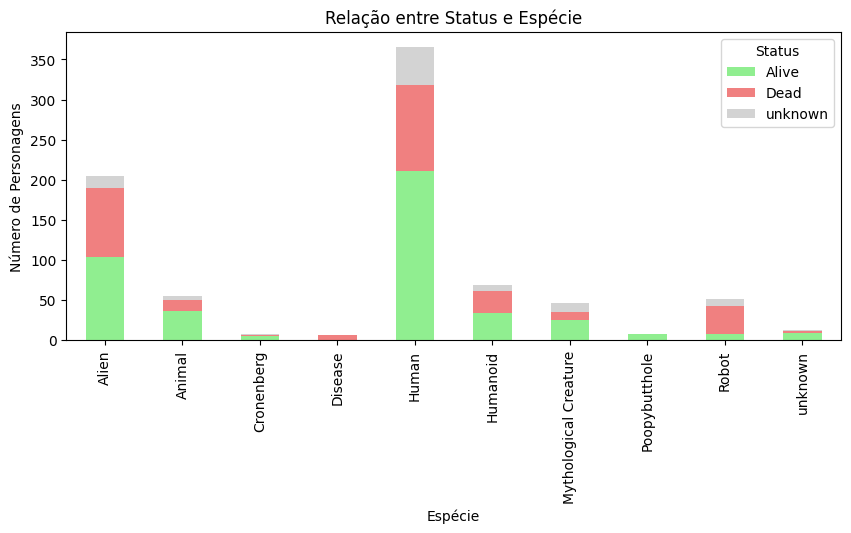

In [23]:

status_species.plot(kind='bar', stacked=True, figsize=(10, 4), color=['#90EE90', '#F08080', '#D3D3D3'])
plt.title('Relação entre Status e Espécie')
plt.xlabel('Espécie')
plt.ylabel('Número de Personagens')
plt.legend(title='Status')
plt.show()
